In [1]:
# RandDist package
import randdist
# other packages
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import pandas as pd
import numpy as np

# Generate Numbers

In [2]:
# parameters
min_value = -3
max_value = 3
step = 0.5
formula = lambda x:12-(x**2)
seeds = 1000

# generate int numbers
random_list_int = randdist.randint(min_value, max_value, step, formula, seeds)

# generate float numbers
random_list_float = randdist.randfloat(min_value, max_value+step, step, formula, seeds)

# Plot Distributions

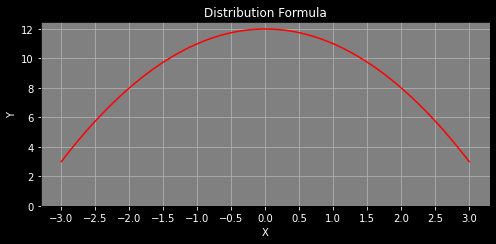

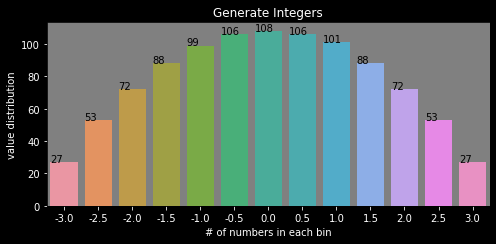

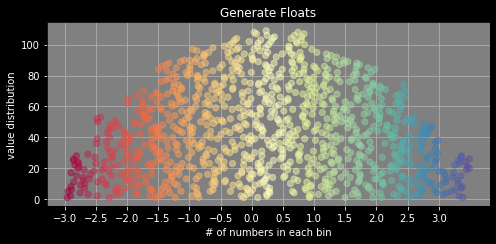

In [11]:
# plot dirstribution
xpts = np.linspace(min_value, max_value, 100)
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.plot(xpts, formula(xpts), color = 'r')
plt.tick_params(color='white',labelcolor='white')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
ax.set_ylim(ymin=min(0, min(formula(i) for i in range(min_value, max_value))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Distribution Formula', color='white')
plt.savefig('formula_plot.png')
plt.show()

# plot int numbers distribution
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.rcParams["figure.autolayout"] = True
plt.tick_params(color='white',labelcolor='white')
ax = sns.countplot(x="dist", data=pd.DataFrame(dict(dist=np.array(random_list_int))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.ylabel('value distribution')
plt.xlabel('# of numbers in each bin')
plt.title('Generate Integers', color='white')
plt.savefig('distribution_plot_int.png')
plt.show()

# plot float numbers distribution
y = []
bin_y = randdist._adjust_values(min_value, max_value+step, step, formula, seeds)
bin_y_count = {}
for i in random_list_float:
    for key, value in bin_y.items():
        if i >= key and i <= key + step:
            bin_y_count.setdefault(key, 0)
            bin_y_count[key] += 1
            y.append(bin_y_count[key])
            break
x = random_list_float
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['axes.axisbelow'] = True
plt.figure(facecolor=(0,0,0))
plt.grid()
plt.scatter(np.array(x), np.array(y), alpha=0.5,marker='.', s=150, c=x, cmap=plt.cm.Spectral)
plt.tick_params(color='white', labelcolor='white')
plt.ylabel('value distribution', color='white')
plt.xlabel('# of numbers in each bin', color='white')
plt.xticks(np.arange(min_value, max_value+step, step))
plt.title('Generate Floats', color='white')
plt.savefig('distribution_plot_float.png')
plt.show()

# Test Distributions
with 10K generated numbers

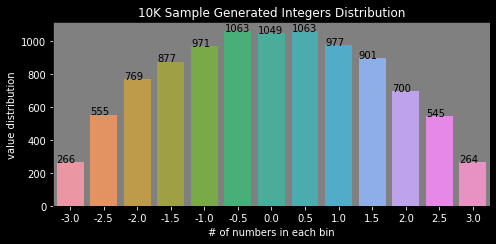

In [12]:
# pick samples from 10K generated list of numbers
generated_list = []
for i in range(10000):
    sample_int = randdist.randint(min_value, max_value, step, formula, seeds, sample_size = 1)
    generated_list.append(sample_int)

# plot int numbers distribution
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.tick_params(color='white',labelcolor='white')
ax = sns.countplot(x="dist", data=pd.DataFrame(dict(dist=np.array(generated_list))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.ylabel('value distribution')
plt.xlabel('# of numbers in each bin')
plt.title('10K Sample Generated Integers Distribution', color='white')
plt.savefig('distribution_plot_test.png')
plt.show()